In [109]:
from simpsom import plots as splots
from simpsom.neighborhoods import Neighborhoods
import numpy as np
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.size"] = 14

In [110]:
nei = Neighborhoods(np, 10, 10, 'hexagons', PBC=False)
othernei = Neighborhoods(np, 6, 6, 'hexagons', PBC=True)
coords = nei.coordinates
othercoords = othernei.coordinates
indices = np.arange(len(coords))
outermask = (
    (indices // nei.height < 2) | 
    (indices // nei.height > nei.height - 3) | 
    (indices % nei.width < 2) | 
    (indices % nei.width > nei.width - 3)
)
grid1 = np.arange(nei.width * nei.height).reshape(nei.height, nei.width, order='F')
grid2  = np.arange(othernei.width * othernei.height).reshape(othernei.height, othernei.width, order='F')
theslice = slice(grid2.shape[0] - 2, grid2.shape[0] - 2 + grid1.shape[0])
grid1[:, :2] = np.tile(grid2[:, -2:].T, 3)[:, theslice].T
grid1[:, -2:] = np.tile(grid2[:, :2].T, 3)[:, theslice].T
grid1[:2, :] = np.tile(grid2[-2:, :], 3)[:, theslice]
grid1[-2:, :] = np.tile(grid2[:2, :], 3)[:, theslice]
grid1 = grid1.flatten(order='F')
grid1[~outermask] = grid2.flatten(order='F')

(0.7320507764816284, 7.062177658081055)

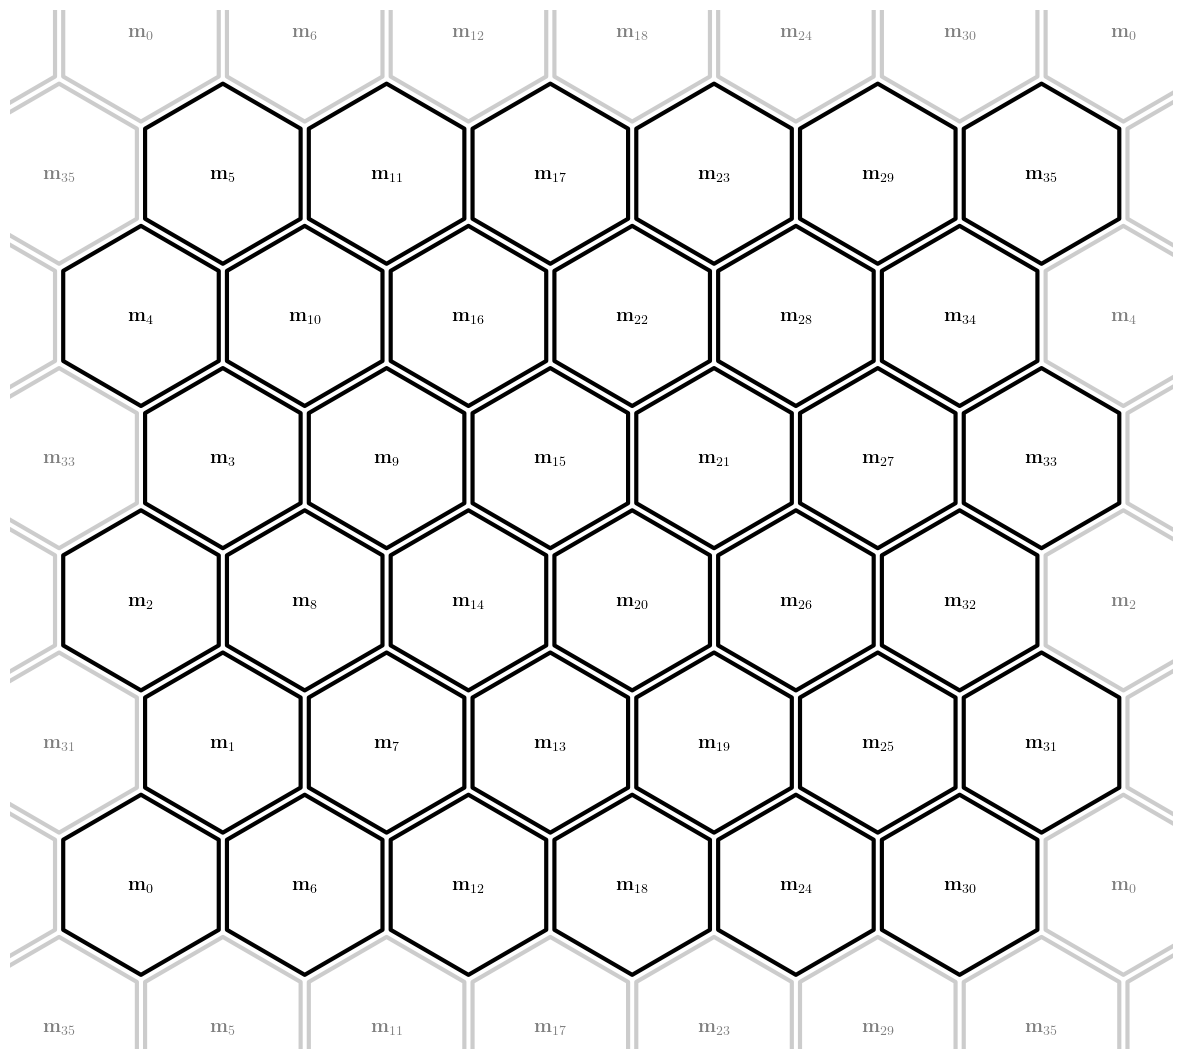

In [102]:
edgecolors = np.full(len(coords), 'black', dtype=object)
edgecolors[outermask] = 'gray'
alphas = np.ones(len(coords))
alphas[outermask] = 0.2
fig, ax = splots.plot_map(
    coords, np.ones(len(coords)), 'hexagons', 
    draw_cbar=False, figsize=(15, 13.5), 
    show=False, edgecolors = 'black', cmap='Greys',
    alphas=alphas, linewidths=3,
)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

In [103]:
traj

array([28, 30, 32])

In [156]:
segments = []
reps = []
traj = np.random.randint(low=0, high=35, size=20)
prev = coords[~outermask][traj[0]]
for i, j in enumerate(traj[1:]):
    ks = np.where(grid1==j)[0]
    distances = np.linalg.norm(prev[None, :] - coords[ks, :], axis=1)
    mindist = np.amin(distances)
    winnerks = ks[np.where(distances == mindist)[0]]
    next_ = coords[~outermask][j].copy()
    if np.all(outermask[winnerks]):
        winnerk = winnerks[0]
        segments.append(np.vstack([prev, coords[winnerk]]))
        ks = np.where(grid1==traj[i])[0]
        distances = np.linalg.norm(next_[None, :] - coords[ks, :], axis=1)
        mindist = np.amin(distances)
        winnerk2 = ks[np.where((distances == mindist) & outermask[ks])[0][0]]
        segments.append(np.vstack([coords[winnerk2], next_]))
        reps.append(2)
    else:
        segments.append(np.vstack([prev, next_]))
        reps.append(1)
    prev = next_.copy()

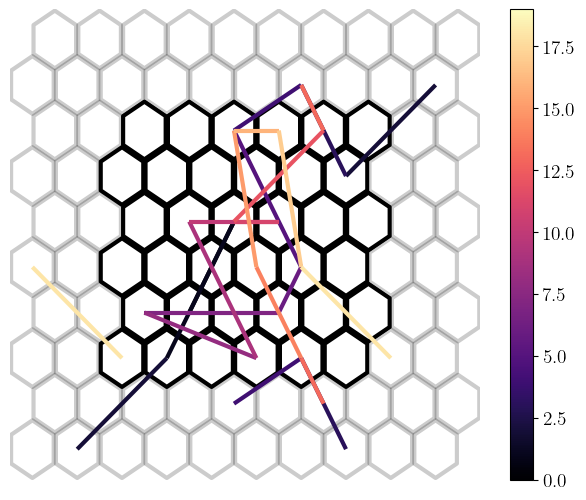

In [157]:
from plots import *
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(6, 6 * 0.8))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
thesepops = np.sum(traj[:, None] == np.arange(36)[None, :], axis=0)
kwargs = dict(cmap=mpl.colormaps['gray_r'], norm=Normalize(0, np.amax(thesepops)))

fig, ax = splots.plot_map(
    coords, np.ones(len(coords)), 'hexagons', 
    draw_cbar=False, figsize=(15, 13.5), 
    show=False, edgecolors = 'black', cmap='Greys',
    alphas=alphas, linewidths=3, fig=fig, ax=ax
)

norm = Normalize(0, len(traj) - 1)
lc = LineCollection(segments, cmap='magma', norm=norm)
lc.set_array(np.repeat(np.arange(len(traj) - 1), repeats=reps))
lc.set_linewidth(3)
im = ax.add_collection(lc)
cbar = fig.colorbar(im)
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)

In [132]:
prev = coords[~outermask][traj[0]]
next_ = coords[~outermask][traj[1]]

In [133]:
ks = np.where(grid1==traj[1])[0]

In [134]:
distances = np.linalg.norm(prev[None, :] - coords[ks, :], axis=1)

In [137]:
mindist = np.amin(distances)
winnerks = ks[np.where(distances == mindist)[0]]

In [139]:
ks

array([12, 18, 72, 78])

In [140]:
ks[outermask[ks]]

array([12, 18, 78])

In [5]:
traj = np.random.randint(low=0, high=35, size=92)

array([30, 32,  6, 10,  1, 24, 18,  9, 27,  5,  9, 18, 32, 11, 32,  3, 31,
       11, 17, 22, 12, 14, 12, 29, 17,  5, 19,  1,  4,  6,  8, 29, 17,  8,
       19,  6, 18, 25, 17, 23, 30, 15, 19, 32,  4,  0, 34, 14, 30, 13,  7,
       14, 19, 16, 21, 20, 24, 17, 13, 32, 14, 34, 18,  7, 18,  1,  0,  6,
       10, 11, 15, 10,  6,  4, 33, 11, 18,  3, 34, 13, 21, 29, 24, 22, 17,
       32, 18, 18,  4, 23, 10, 16])

(0.7320507764816284, 7.062177658081055)

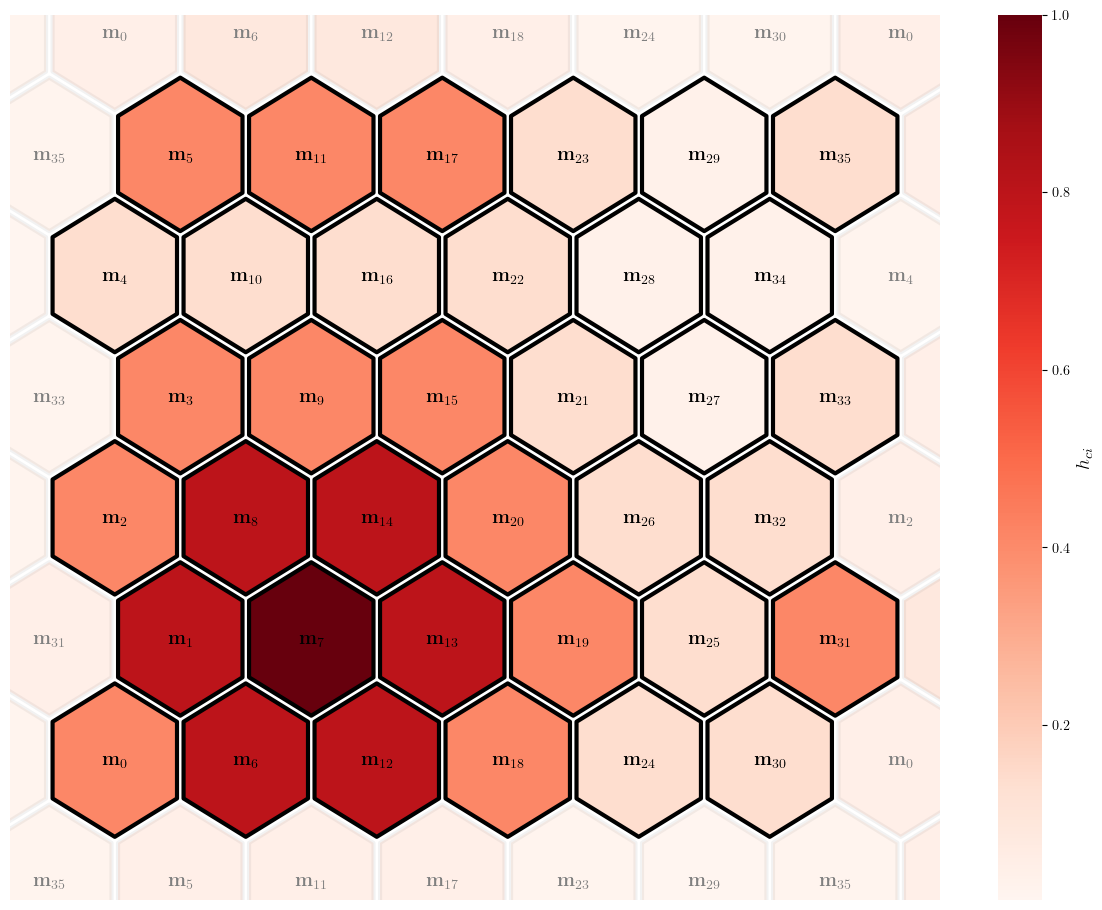

In [14]:
nei_caller = othernei.neighborhood_caller(7, 1.5, 'gaussian')[grid1]
nei_caller[outermask] /= 10
alphas[outermask] = 0.1
fig, ax = splots.plot_map(coords, nei_caller, 'hexagons', draw_cbar=True, figsize=(15, 11.5), show=False, edgecolors = edgecolors, cmap='Reds', cbar_label=r'$h_{ci}$', alphas=alphas, linewidths=3.)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        t = r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$'
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)